In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter

2023-11-13 18:23:17.758462: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 18:23:17.881933: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 18:23:17.881966: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 18:23:17.882783: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 18:23:17.938358: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 18:23:17.939722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
image_data='fungi/'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H1
1,H6
2,H3
3,H5
4,H2


In [4]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,fungi/H1/H1_29b_3.jpg,H1
1,fungi/H2/H2_11b_14.jpg,H2
2,fungi/H1/H1_22c_20.jpg,H1
3,fungi/H1/H1_48d_4.jpg,H1
4,fungi/H2/H2_11a_1.jpg,H2
...,...,...
9109,fungi/H1/H1_90b_5.jpg,H1
9110,fungi/H2/H2_121b_2.jpg,H2
9111,fungi/H1/H1_7a_5.jpg,H1
9112,fungi/H1/H1_111b_13.jpg,H1


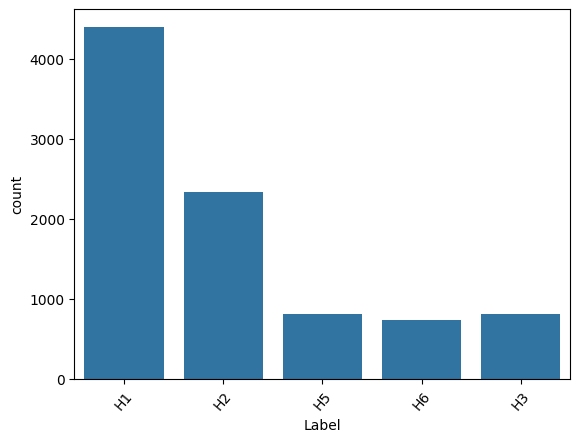

In [5]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [6]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)



Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [7]:
class_names = train.class_names

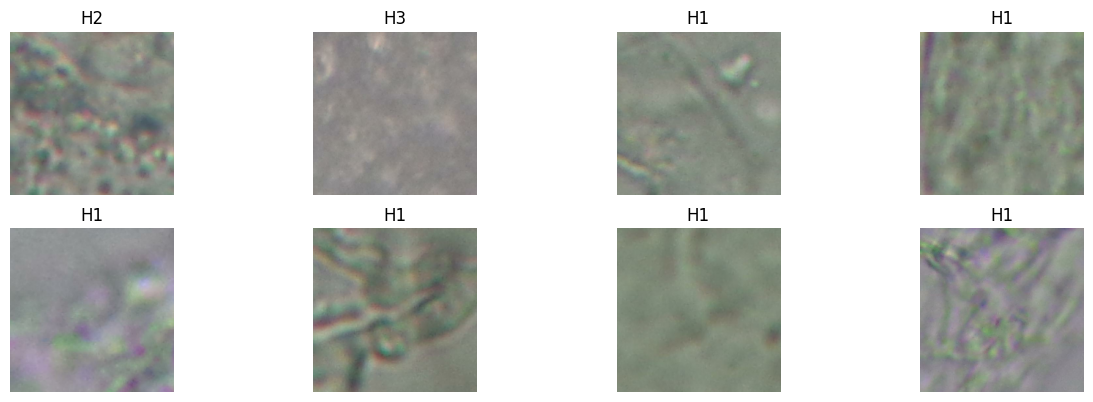

In [8]:

plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



In [10]:

base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
keras_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dropout (Dropout)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 5)                 141125    
                                                                 
Total params: 1080245 (4.12 MB)
Trainable params: 141125 (551.27 KB)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


In [11]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [12]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [14]:
keras_model.compile(
    optimizer ='Adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
hist=keras_model.fit_generator(
    train,epochs=5,
    validation_data=validation,
    callbacks=[checkpoint,early_stopping])

Epoch 1/10


/tmp/ipykernel_33663/1768586533.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=keras_model.fit_generator(


228/228 [==============================] - ETA: 0s - loss: 1.5425 - accuracy: 0.6155

/home/frost/Programing/Bootcamps/MLE/VertexAi/ComputerVision_project/Project1-ComputerVision/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


228/228 [==============================] - 68s 284ms/step - loss: 1.5425 - accuracy: 0.6155 - val_loss: 0.6184 - val_accuracy: 0.8079
Epoch 2/10
228/228 [==============================] - 64s 280ms/step - loss: 0.8922 - accuracy: 0.7523 - val_loss: 0.4899 - val_accuracy: 0.8480
Epoch 3/10
228/228 [==============================] - 63s 275ms/step - loss: 0.7663 - accuracy: 0.7880 - val_loss: 0.4389 - val_accuracy: 0.8644
Epoch 4/10
228/228 [==============================] - 63s 276ms/step - loss: 0.6724 - accuracy: 0.8169 - val_loss: 0.4606 - val_accuracy: 0.8688
Epoch 5/10
228/228 [==============================] - 63s 277ms/step - loss: 0.5450 - accuracy: 0.8459 - val_loss: 0.4230 - val_accuracy: 0.8869
Epoch 6/10
228/228 [==============================] - 64s 279ms/step - loss: 0.4807 - accuracy: 0.8618 - val_loss: 0.5768 - val_accuracy: 0.8403
Epoch 7/10
228/228 [==============================] - 64s 280ms/step - loss: 0.5159 - accuracy: 0.8635 - val_loss: 0.4019 - val_accuracy: 0.8

In [15]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 13s 223ms/step - loss: 0.3784 - accuracy: 0.9297
Test Loss = 0.3784155547618866
Test Accuracy = 0.9297475218772888


In [16]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,1.542539,0.615469,0.618368,0.807903
1,0.892249,0.752331,0.489893,0.847969
2,0.766305,0.787987,0.438867,0.864435
3,0.672364,0.816923,0.460555,0.868825
4,0.545045,0.845858,0.422981,0.886937
5,0.480698,0.861766,0.576841,0.840285
6,0.515945,0.863549,0.401877,0.894072
7,0.498105,0.870406,0.401754,0.914380
8,0.459078,0.882063,0.394203,0.922612
9,0.391118,0.898519,0.378416,0.929748


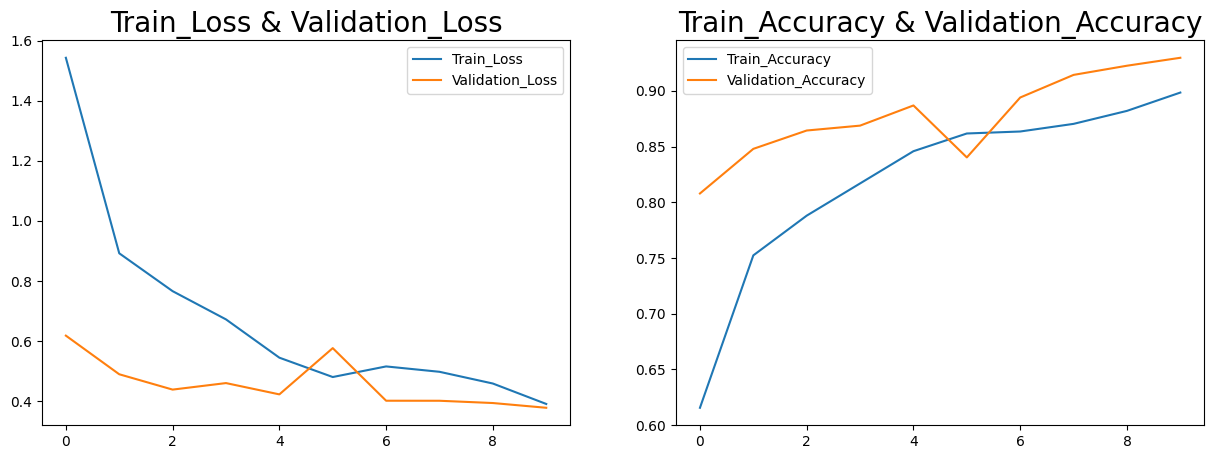

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [18]:
X_val, y_val, y_pred = [], [], []

# Iterate over batches
for images, labels in validation:
    # Convert tensors to numpy arrays
    images = images.numpy()
    labels = labels.numpy()

    # Predict batch
    predictions = keras_model.predict(images)

    # Extend lists
    y_val.extend(labels)
    X_val.extend(images)
    y_pred.extend(np.argmax(predictions, axis=1))

# Create DataFrame
df = pd.DataFrame({'Actual': y_val, 'Prediction': y_pred})

: 

In [1]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

NameError: name 'plt' is not defined

In [ ]:

ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))